In [141]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.6 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 20.7 MB/s eta 0:00:00m eta 0:00:010:01:01


In [142]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
#데이터 시각화 + 패키지
import seaborn as sns
#통계 분석 패키지
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
#그래프 표시
%matplotlib inline
#선형 회귀분석모델 formula(y ~ X1 + X2 +)
import statsmodels.formula.api as smf
#회귀분석의 정규성 확인
from statsmodels.api import qqplot,add_constant
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#학습용과 평가용 데이터 분리
from sklearn.model_selection import train_test_split
#선형회귀모형 
from sklearn.linear_model import LinearRegression
#변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
#평가함수
from sklearn.metrics import r2_score

matplotlib.rc('font',family = 'Noto sans CJK JP')
#음수 표시
matplotlib.rc('axes',unicode_minus = False)
%matplotlib inline

#릿지 사용
from sklearn.linear_model import Ridge

#라쏘 사용
from sklearn.linear_model import Lasso 

#엘라스틱넷 사용
from sklearn.linear_model import ElasticNet 

#graphviz : 나무 구조 시각화 및 의사결정나무
import graphviz 

from sklearn.tree import DecisionTreeRegressor, export_graphviz

#예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor

#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 예측/회귀 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

# 예측/회귀 그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor
matplotlib.rc('font',family = 'Noto sans CJK JP')
#음수 표시
matplotlib.rc('axes',unicode_minus = False)
%matplotlib inline

# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 주성분 분석
from sklearn.decomposition import PCA

# 회귀 분석
import statsmodels.api as sm

# 시계열 분석을 위한 auto arima설치
#!pip install pmdarima

# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# ARIMA
from statsmodels.tsa.arima.model import ARIMA

# auto_arima
from pmdarima import auto_arima

# 오류 무시
import warnings
warnings.filterwarnings('ignore')

In [66]:
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true - y_pred)/ y_true)) * 100

In [67]:
df_raw = pd.read_csv("/home/piai/문서/빅데이터분석실습/2. Big Data 분석/체질검사.csv",encoding = 'euc-kr')
df_raw.head() # 데이터 불러오기

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [68]:
df_raw[['WEIGHT','WEIGHT_UNIT']] = df_raw['WEIGHT'].str.split(expand = True)
df_raw[['HEIGHT','HEIGHT_UNIT']] = df_raw['HEIGHT'].str.split(expand = True)
df_raw['WEIGHT'] = df_raw['WEIGHT'].astype('float64')
df_raw['HEIGHT'] = df_raw['HEIGHT'].astype('float64')
df_raw.info() #  수치형 변수인 몸무게와 키 변수 처리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAT          252 non-null    float64
 1   AGE          252 non-null    int64  
 2   WEIGHT       252 non-null    float64
 3   HEIGHT       252 non-null    float64
 4   NECK         252 non-null    float64
 5   CHEST        252 non-null    float64
 6   ABDOMEN      252 non-null    float64
 7   HIP          252 non-null    float64
 8   THIGH        252 non-null    float64
 9   KNEE         252 non-null    float64
 10  ANKLE        252 non-null    float64
 11  BICEPS       252 non-null    float64
 12  FOREARM      252 non-null    float64
 13  WRIST        252 non-null    float64
 14  GENDER       252 non-null    object 
 15  WEIGHT_UNIT  252 non-null    object 
 16  HEIGHT_UNIT  252 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 33.6+ KB


In [69]:
df_raw = df_raw.drop(['WEIGHT_UNIT','HEIGHT_UNIT'], axis = 1)
# 단위를 나타내는 항목 제외

In [70]:
df_raw['WEIGHT'] = df_raw['WEIGHT'] * 0.45
df_raw['HEIGHT'] = df_raw['HEIGHT'] * 2.54

In [80]:
   # 이상치 확인 후 몸무게와 키의 이상치 제거
df_raw.drop(df_raw[df_raw["HEIGHT"] <= 100].index, inplace=True)
df_raw['GENDER'] = df_raw['GENDER'].replace(1,0).replace(2,1)
df_raw_dummy = pd.get_dummies(df_raw,drop_first = True)
df_raw_dummy.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
1,11.8,27,75.6000,180.975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0
2,22.2,69,79.9875,173.990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0
3,10.6,57,66.4875,167.005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1
4,47.5,51,98.5500,162.560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1
5,24.2,40,91.0125,177.800,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0,0


In [81]:
df_raw_y = df_raw_dummy["FAT"]
df_raw_x = df_raw_dummy.drop("FAT",axis = 1, inplace = False)

In [89]:
df_train,df_test = train_test_split(df_raw_dummy, test_size = 0.3, random_state = 1234)
print("train data size : {}". format(df_train.shape))
print("test data size : {}". format(df_test.shape))

train data size : (175, 15)
test data size : (75, 15)


In [90]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}". format(df_train_x.shape))
print("train data T size : {}". format(df_train_y.shape))
print("test data X size : {}". format(df_test_x.shape))
print("test data Y size : {}". format(df_test_y.shape))

train data X size : (175, 14)
train data T size : (175,)
test data X size : (75, 14)
test data Y size : (75,)


In [91]:
# 회귀 모델
lr_model = smf.ols(formula = "FAT ~  HEIGHT  + ABDOMEN + WRIST", data = df_train)
lr_result = lr_model.fit()
print(lr_result.summary())

# Decision Tree
dt_model = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8, min_samples_split = 20, max_depth = 4)
dt_model.fit(df_train_x,df_train_y)

# Random Forest
rf_model = RandomForestRegressor(random_state = 1234,n_estimators = 130, min_samples_leaf = 7, min_samples_split = 20, max_depth = 4)
rf_model.fit(df_train_x, df_train_y)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state = 1234,n_estimators = 30, min_samples_leaf = 11, 
                                     min_samples_split = 22, max_depth = 4, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     162.2
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           8.86e-50
Time:                        10:19:43   Log-Likelihood:                -498.61
No. Observations:                 175   AIC:                             1005.
Df Residuals:                     171   BIC:                             1018.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0329      9.214      1.306      0.1

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [92]:
models = ["회귀분석","의사결정나무","랜덤 포레스트","그래디언트 부스팅"]
mse,rmse,mae,mape = [],[],[],[]

In [93]:
# 회귀분석
# 예측
lr_y_pred = lr_result.predict(df_test)

# 평가
mse.append(mean_squared_error(df_test['FAT'], lr_y_pred))
rmse.append(root_mean_squared_error(df_test['FAT'], lr_y_pred))
mae.append(mean_absolute_error(df_test['FAT'], lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['FAT'], lr_y_pred))

In [94]:
# 의사결정나무
# 예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test['FAT'], dt_y_pred))
rmse.append(root_mean_squared_error(df_test['FAT'], dt_y_pred))
mae.append(mean_absolute_error(df_test['FAT'], dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test['FAT'], dt_y_pred))

In [95]:
# 랜덤 포레스트
# 예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test['FAT'], rf_y_pred))
rmse.append(root_mean_squared_error(df_test['FAT'], rf_y_pred))
mae.append(mean_absolute_error(df_test['FAT'], rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test['FAT'], rf_y_pred))

In [96]:
# 그래디언트 부스팅
# 예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test['FAT'], gb_y_pred))
rmse.append(root_mean_squared_error(df_test['FAT'], gb_y_pred))
mae.append(mean_absolute_error(df_test['FAT'], gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test['FAT'], gb_y_pred))

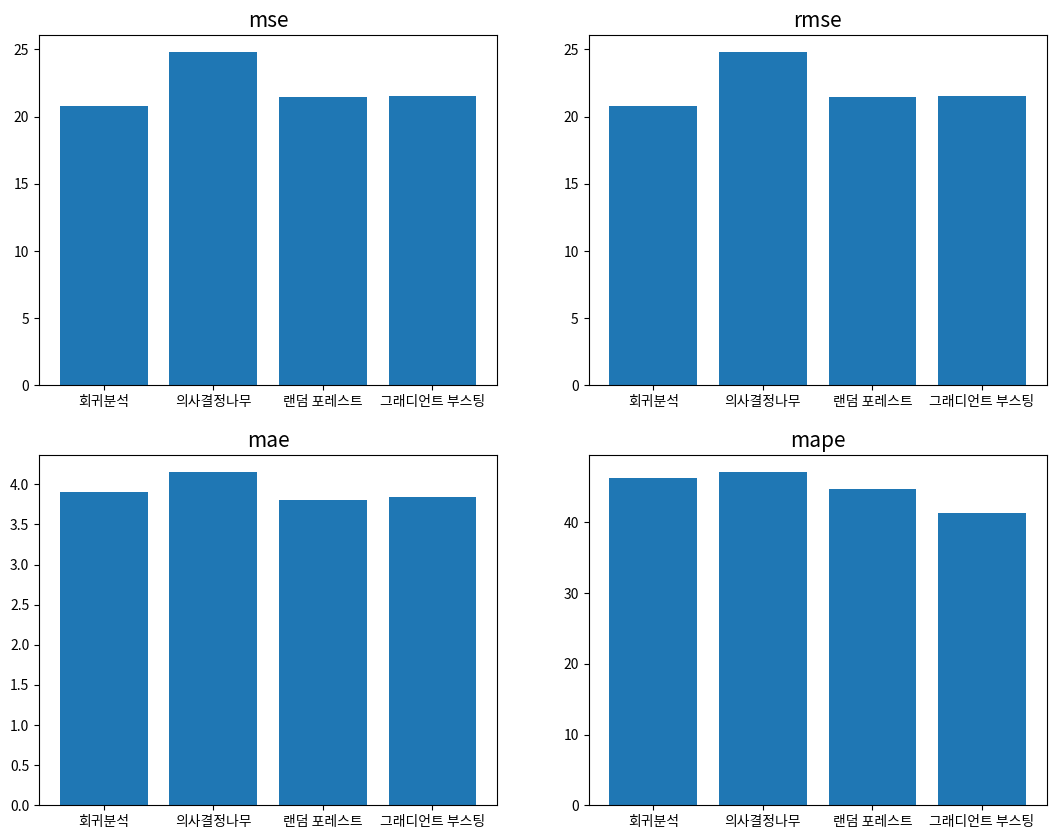

In [97]:
fig, ax = plt.subplots(2,2,figsize = (13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)
# MSE(Mean Squared Error 평균제곱오차) = 모델 예측값과 실제값 간의 오차 제곱합의 평균 


ax[0,1].bar(models,mse)
ax[0,1].set_title("rmse").set_fontsize(15)
# RMSE(Root MSE 평균 제곱근 오차) : Scale(단위) 영향이 있고 이상치에 의해 왜곡 될 수 있음

ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)
# MAE(Mean Absolute Error 평균절대오차) : 모델 예측값과 실제값 간의 오차 절대값 합의 평균

ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)
# MAPE(Mean Absolute Percentage Error 평균 절대비율오차) : MSE, RMSE의 단점(scale의 영향)을 보완

In [105]:
df_raw = pd.read_csv("/home/piai/문서/빅데이터분석실습/2. Big Data 분석/DIABETES.csv",encoding = 'euc-kr')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [106]:
df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop("Y",axis = 1, inplace = False)

In [107]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}". format(df_train_x.shape))
print("train data T size : {}". format(df_train_y.shape))
print("test data X size : {}". format(df_test_x.shape))
print("test data Y size : {}". format(df_test_y.shape))

train data X size : (309, 10)
train data T size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


In [ ]:
models = ["회귀분석","의사결정나무","랜덤 포레스트","그래디언트 부스팅"]
mse,rmse,mae,mape = [],[],[],[]

In [ ]:
# 회귀분석
# 예측
lr_y_pred = lr_result.predict(df_test)

# 평가
mse.append(mean_squared_error(df_test['Y'], lr_y_pred))
rmse.append(root_mean_squared_error(df_test['Y'], lr_y_pred))
mae.append(mean_absolute_error(df_test['Y'], lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['Y'], lr_y_pred))

# 주성분 분석

In [120]:
df_raw = pd.read_csv("/home/piai/문서/빅데이터분석실습/2. Big Data 분석/직무능력평가.csv",encoding = 'euc-kr')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [121]:
df_raw_x = df_raw.drop("EVAL", axis = 1)
df_raw_y = df_raw["EVAL"]
df_raw_y.head()
df_raw_x.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47


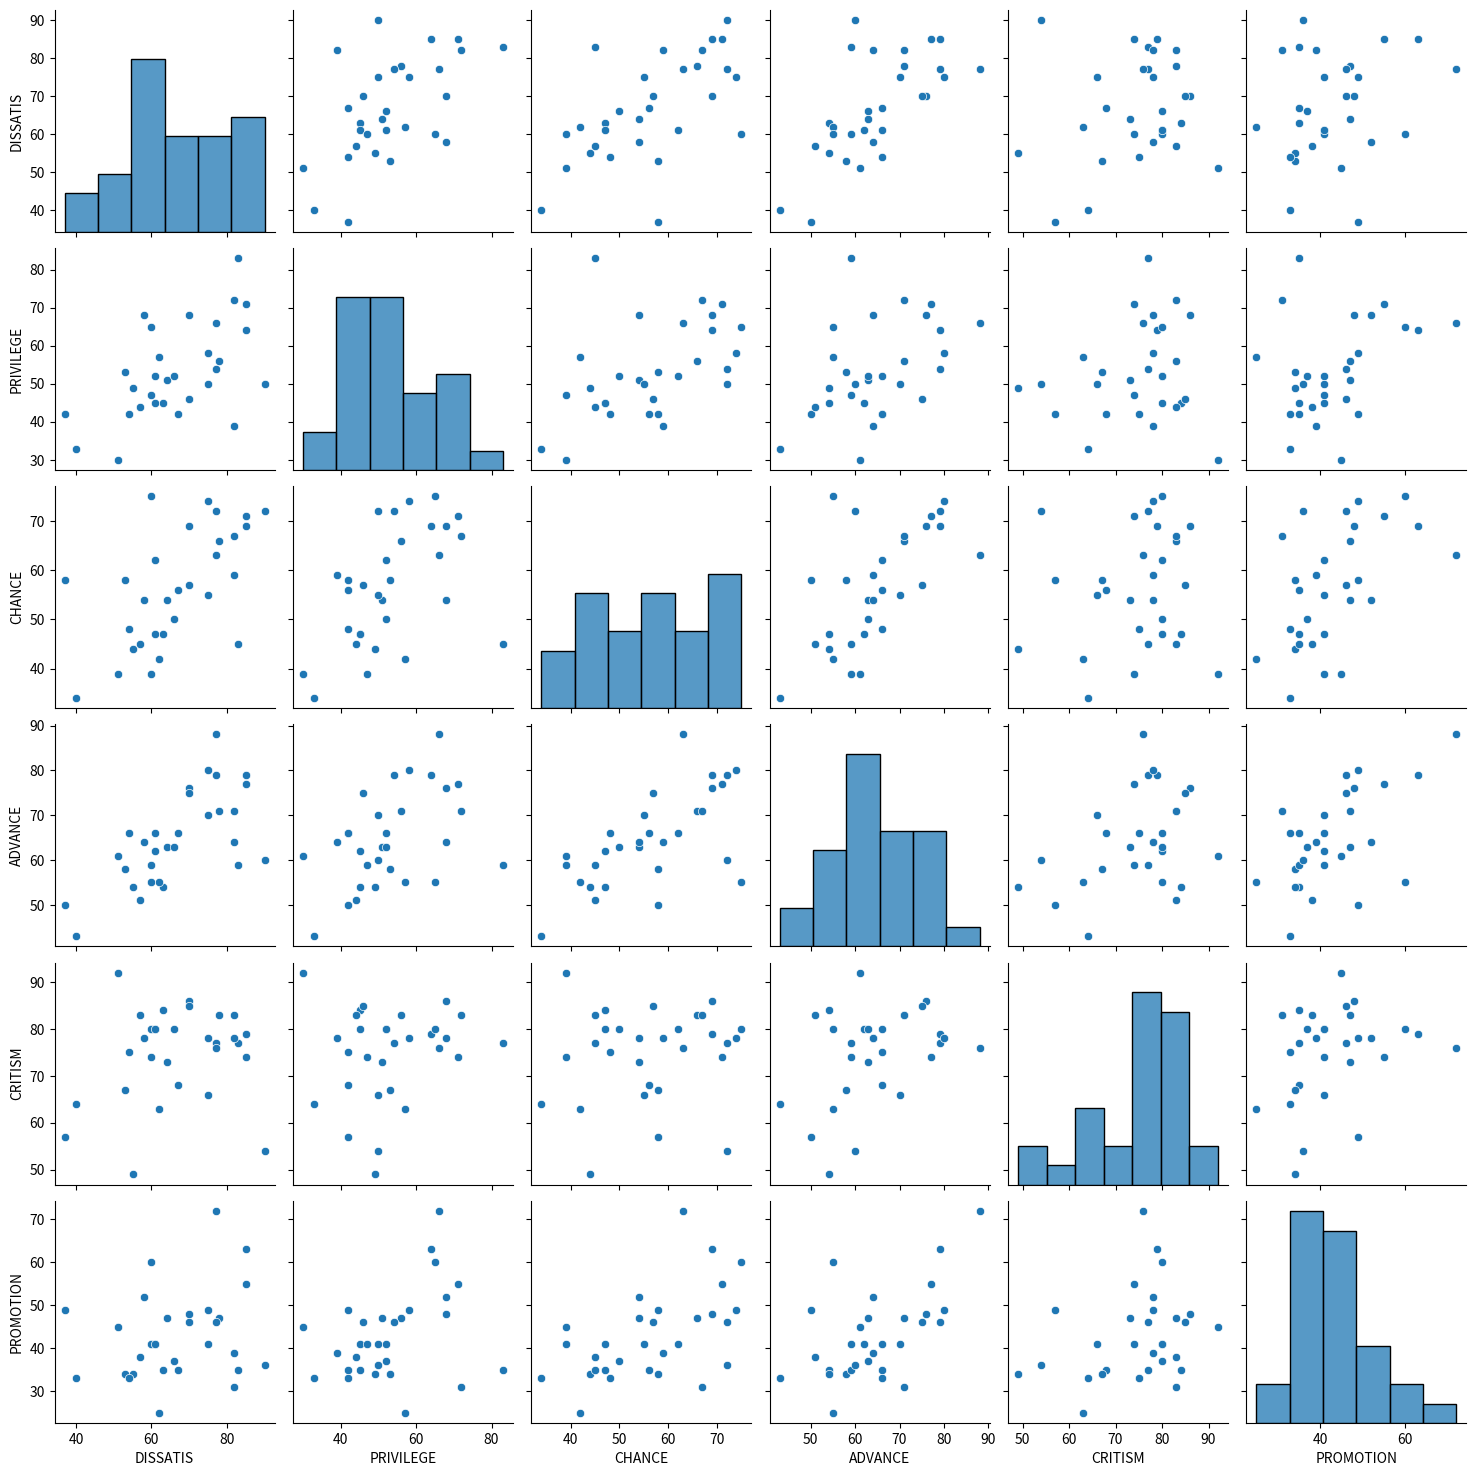

In [122]:
sns.pairplot(df_raw_x)

In [123]:
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


In [124]:
df_raw_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [125]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

print("Scaled Data : \n {}".format(nd_scaled[:5].round(3)))
print("Shape:\n{}".format(nd_scaled.shape))

Scaled Data : 
 [[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape:
(30, 6)


In [126]:
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [127]:
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


In [129]:
pca = PCA(n_components = 6)
nd_pca = pca.fit_transform(df_scaled)

print("PCA Data:\n{}".format(nd_pca[:5]))
print("Shape:\n {}".format(nd_pca.shape))

PCA Data:
[[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape:
 (30, 6)


In [130]:
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461
5,-0.886107,-0.343592,-1.071659,-1.040192,-2.648550,-0.883109,2.463594,1.912424,0.788183,0.174332,0.709853,-0.214980
6,0.030555,-0.925481,-0.031774,0.133692,-0.695544,-0.784254,0.755680,0.510980,-0.042249,-1.036323,0.058321,-0.252712
7,0.641664,-0.260465,-0.118431,0.524987,-0.901124,-0.191121,-0.107754,0.818047,0.016631,-0.709458,0.658251,-0.007035
8,1.176384,1.568330,0.921454,0.622811,0.846302,-1.179676,-1.608941,0.679477,-1.814521,0.313533,-0.688569,-0.522567
9,-0.427776,-0.676100,-0.811688,-0.257602,0.537933,-0.191121,0.908086,-0.859195,-0.259094,-0.124773,0.199506,0.076567


In [131]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [l for l in range(1,7)]
df_pca_stat["EigenValues"] = pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


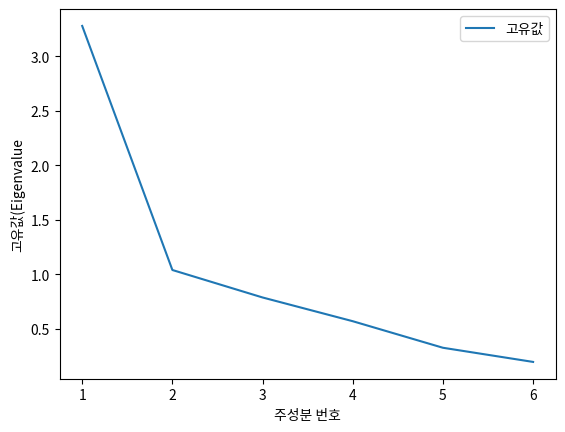

In [132]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"],label = "고유값")
plt.ylabel("고유값(Eigenvalue")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

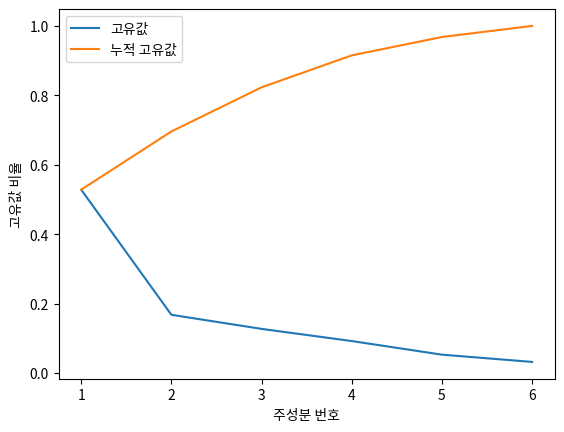

In [133]:
plt.plot(df_pca_stat["PrinNo"],
        df_pca_stat["EigenValueRatio"], label = "고유값")

plt.plot(df_pca_stat["PrinNo"],
        df_pca_stat["CumEigenValueRatio"], label = "누적 고유값")

plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

In [134]:
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})

df_eigenvector = pd.concat([x_cols,pd.DataFrame(pca.components_.T*-1, \
                                               columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])], axis = 1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


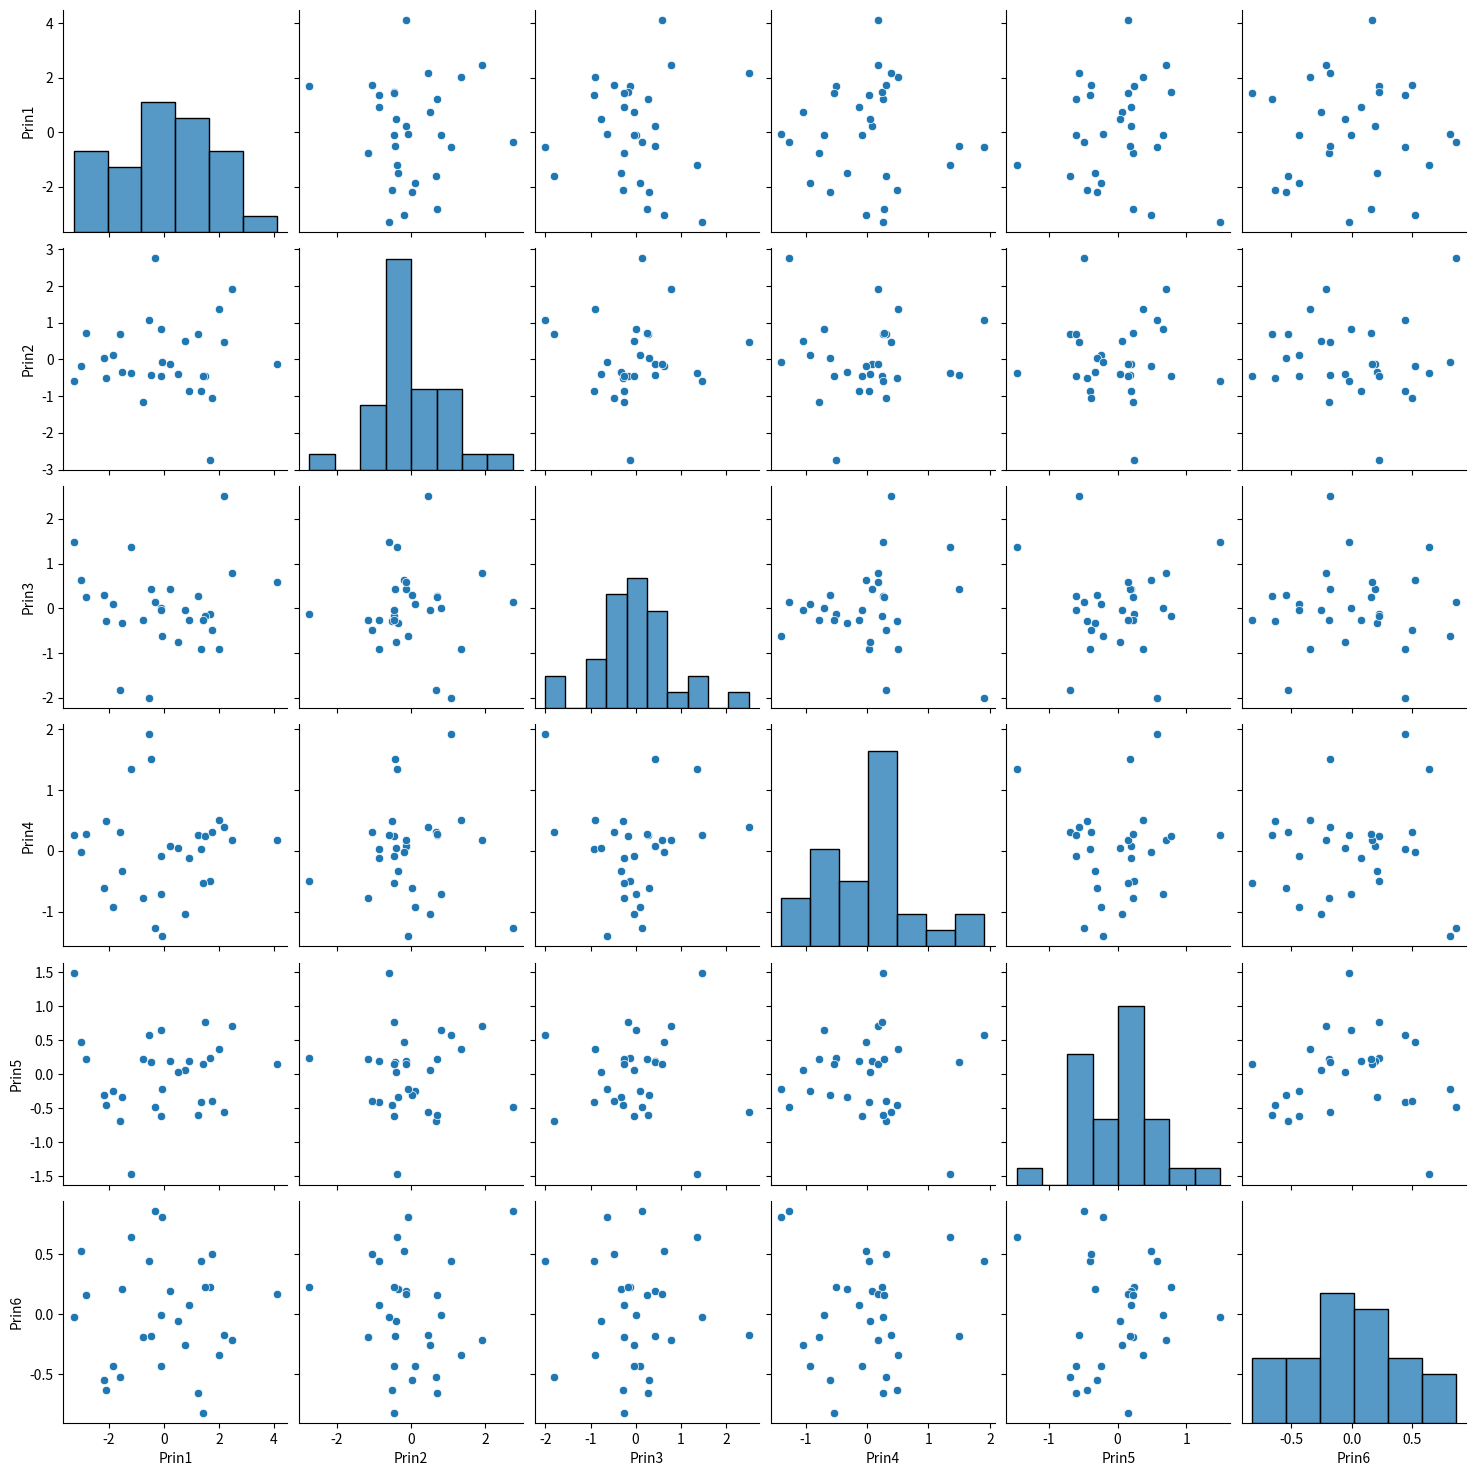

In [135]:
sns.pairplot(df_pca)

In [136]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,-0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,0.0,-0.0
Prin5,0.0,0.0,-0.0,0.0,1.0,0.0
Prin6,0.0,0.0,-0.0,-0.0,0.0,1.0


In [137]:
df_raw_x_const = sm.add_constant(df_raw_x)
reg_model = sm.OLS(df_raw_y,df_raw_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           1.24e-05
Time:                        16:35:52   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [138]:
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           1.24e-05
Time:                        16:36:30   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.290     50.087      0.0

In [139]:
x_var = ["Prin1","Prin2","Prin3"]
df_pca_const = sm.add_constant(df_pca[x_var])
reg_model = sm.OLS(df_raw_y,df_pca_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           1.02e-05
Time:                        16:37:41   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

In [140]:
df_raw = pd.read_csv("/home/piai/문서/빅데이터분석실습/2. Big Data 분석/IRIS.csv",encoding = 'euc-kr')
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df_raw_x = df_raw.drop("EVAL", axis = 1)
df_raw_y = df_raw["EVAL"]
df_raw_y.head()
df_raw_x.head()

# 시계열 자료

In [143]:
df_raw = pd.read_csv("/home/piai/문서/빅데이터분석실습/2. Big Data 분석/환율.csv", parse_dates = ["APPL_DATE"])
df_raw.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


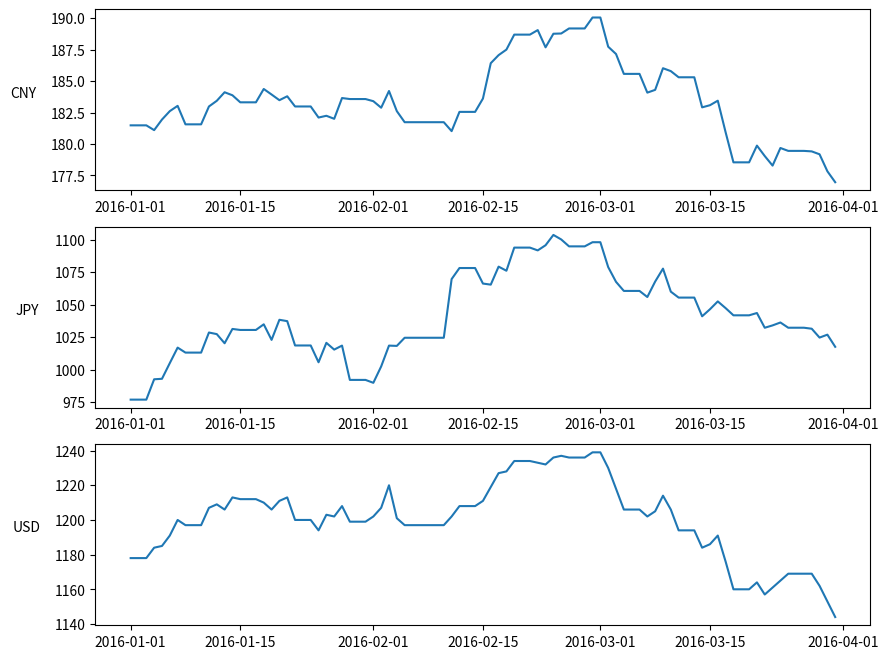

In [145]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (10,8))
for(ax,idx,currency) in zip([ax1,ax2,ax3],[311,312,313],["CNY","JPY","USD"]):
    ax.plot("APPL_DATE","STD_RATE", data = df_raw[df_raw["CURRENCY"] == currency])
    ax.set_ylabel(currency, rotation = 0, labelpad = 20)

In [147]:
df_CNY = df_raw[df_raw["CURRENCY"]=="CNY"].set_index("APPL_DATE")
df_CNY.drop(["CURRENCY","USD_CONV_DATE"],axis = 1, inplace =True)
df_JPY = df_raw[df_raw["CURRENCY"]=="JPY"].set_index("APPL_DATE")
df_JPY.drop(["CURRENCY","USD_CONV_DATE"],axis = 1, inplace =True)
df_USD = df_raw[df_raw["CURRENCY"]=="USD"].set_index("APPL_DATE")
df_USD.drop(["CURRENCY","USD_CONV_DATE"],axis = 1, inplace =True)
df_CNY.head()

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94


In [149]:
df_CNY_train = df_CNY[df_CNY.index <= "2016-03-22"]
df_CNY_test = df_CNY[df_CNY.index > "2016-03-22"]
df_CNY_test.head()

,STD_RATE
APPL_DATE,
2016-03-23,178.28
2016-03-24,179.68
2016-03-25,179.45
2016-03-26,179.45
2016-03-27,179.45


<Axes: xlabel='APPL_DATE'>

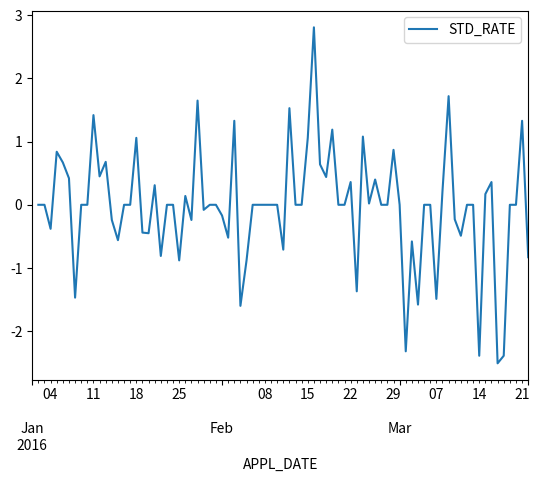

In [150]:
df_CNY_diff1 = df_CNY_train - df_CNY_train.shift(1)
df_CNY_diff1.plot()

<Axes: xlabel='APPL_DATE'>

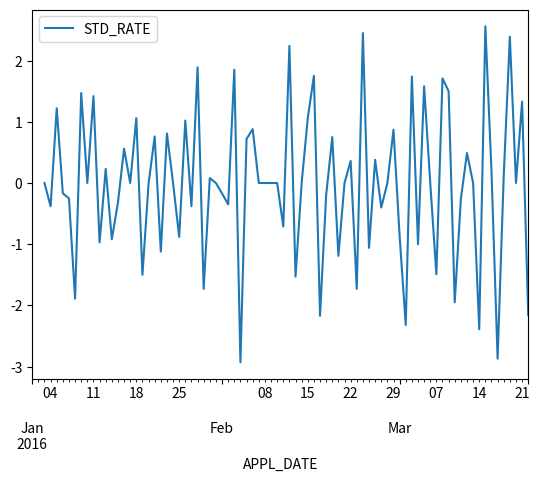

In [151]:
df_CNY_diff2 = df_CNY_train - 2 * (df_CNY_train.shift(1)) + (df_CNY_train.shift(2))
df_CNY_diff2.plot()

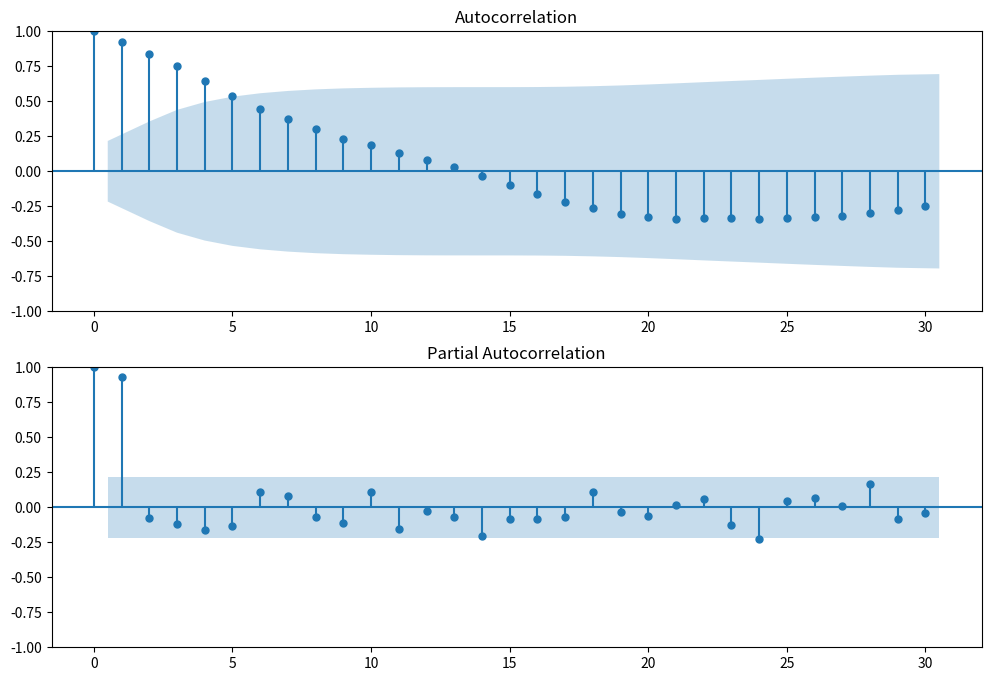

In [152]:
lag_size = 30
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_CNY_train["STD_RATE"], lags=lag_size, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_CNY_train["STD_RATE"], lags=lag_size, ax = ax2)

In [153]:
ts_model_cny = ARIMA(df_CNY_train, order = (1,2,0))
ts_result_cny = ts_model_cny.fit()
print(ts_result_cny.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -123.513
Date:                Wed, 02 Aug 2023   AIC                            251.025
Time:                        17:36:51   BIC                            255.790
Sample:                    01-01-2016   HQIC                           252.936
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4389      0.106     -4.146      0.000      -0.646      -0.231
sigma2         1.2805      0.213      6.014      0.000       0.863       1.698
Ljung-Box (L1) (Q):                   2.62   Jarque-

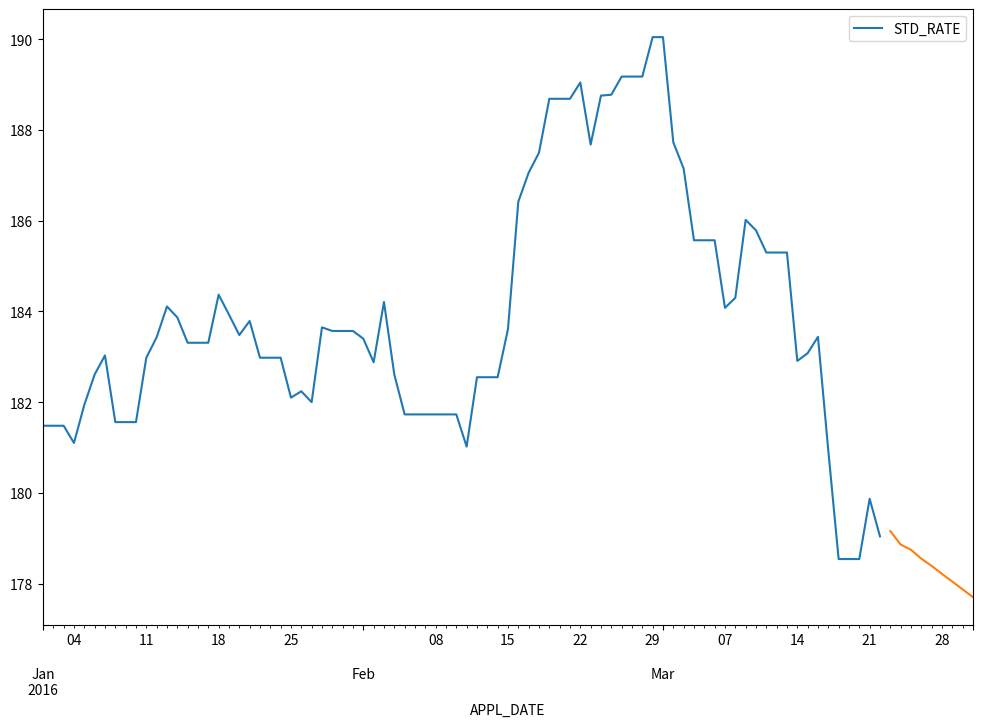

In [154]:
start_time = df_CNY_test.index.min()
end_time = df_CNY_test.index.max()
fig,ax = plt.subplots(figsize = (12,8))
ax = df_CNY_train.plot(ax = ax)
fig = ts_result_cny.predict(start = start_time, end = end_time, ax = ax, plot_insample = False).plot()

In [155]:
start_time = pd.to_datetime("2016-01-03")
y_pred = ts_result_cny.predict(start = start_time, end = end_time, typ = 'levels')
df_merge = df_CNY
df_merge["예측값"] = y_pred
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,181.48,NaN
2016-01-02,181.48,NaN
2016-01-03,181.48,181.480126
2016-01-04,181.10,181.480000
2016-01-05,181.94,180.886776


<Axes: xlabel='APPL_DATE'>

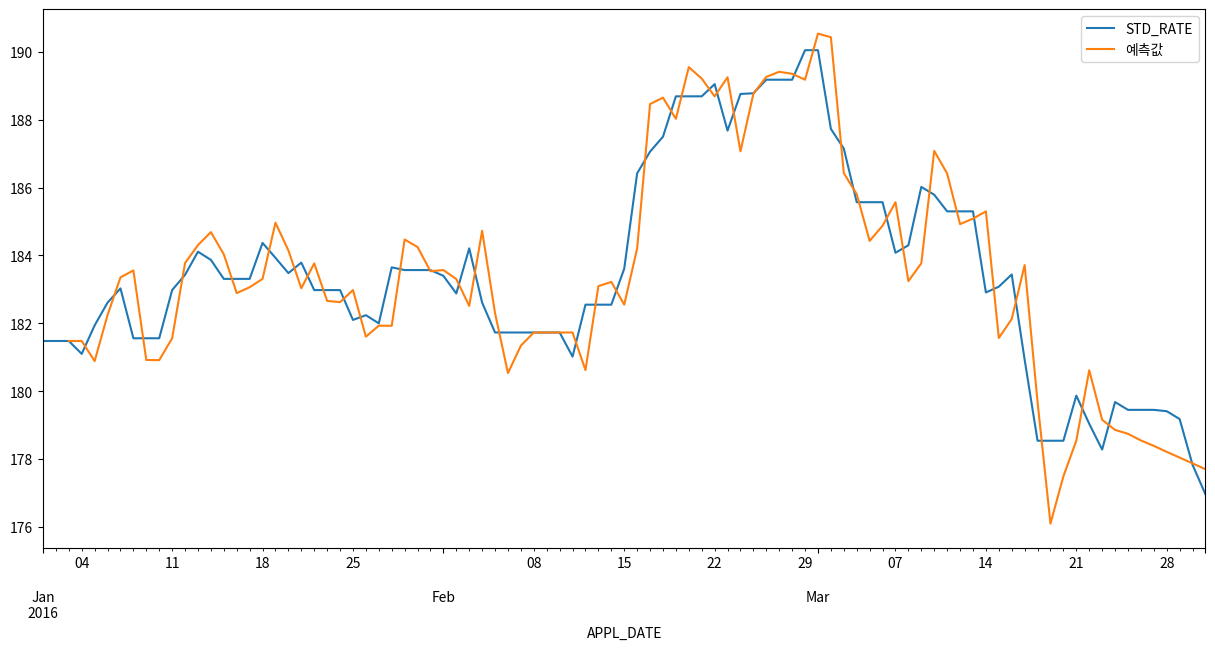

In [156]:
df_merge.plot(y = ["STD_RATE", "예측값"], figsize = (15,7))

In [157]:
ts_model = auto_arima(df_CNY_train, max_p = 3, max_q =3, d=2,
                      trace = True, error_action = 'ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=228.840, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=265.705, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=251.025, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=223.626, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=225.299, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=225.249, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=226.997, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.481 seconds


In [158]:
ts_model_cny = ARIMA(df_CNY_train,order = (0,2,1))
ts_result_cny = ts_model_cny.fit()
print(ts_result_cny.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -109.813
Date:                Wed, 02 Aug 2023   AIC                            223.626
Time:                        18:36:29   BIC                            228.390
Sample:                    01-01-2016   HQIC                           225.536
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9327      0.046    -20.235      0.000      -1.023      -0.842
sigma2         0.8886      0.112      7.904      0.000       0.668       1.109
Ljung-Box (L1) (Q):                   0.15   Jarque-

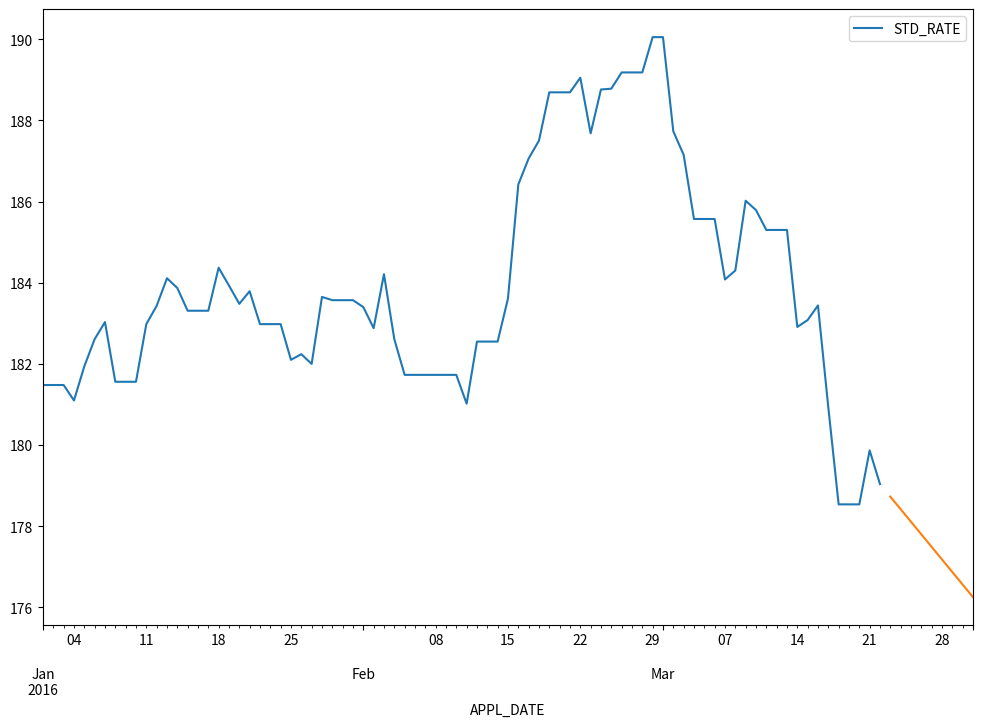

In [160]:
start_time = df_CNY_test.index.min()
end_time = df_CNY_test.index.max()
fig, ax = plt.subplots(figsize = (12,8))

ax = df_CNY_train.plot(ax = ax)
fig = ts_result_cny.predict(start = start_time, end = end_time, ax = ax, plot_imsample = False).plot()

In [161]:
start_time = pd.to_datetime("2016-01-03")
y_pred = ts_result_cny.predict(start = start_time,end = end_time, typ = 'levels')
df_merge = df_CNY
df_merge["예측값"] = y_pred
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,181.48,NaN
2016-01-02,181.48,NaN
2016-01-03,181.48,181.480150
2016-01-04,181.10,181.480075
2016-01-05,181.94,180.972362


<Axes: xlabel='APPL_DATE'>

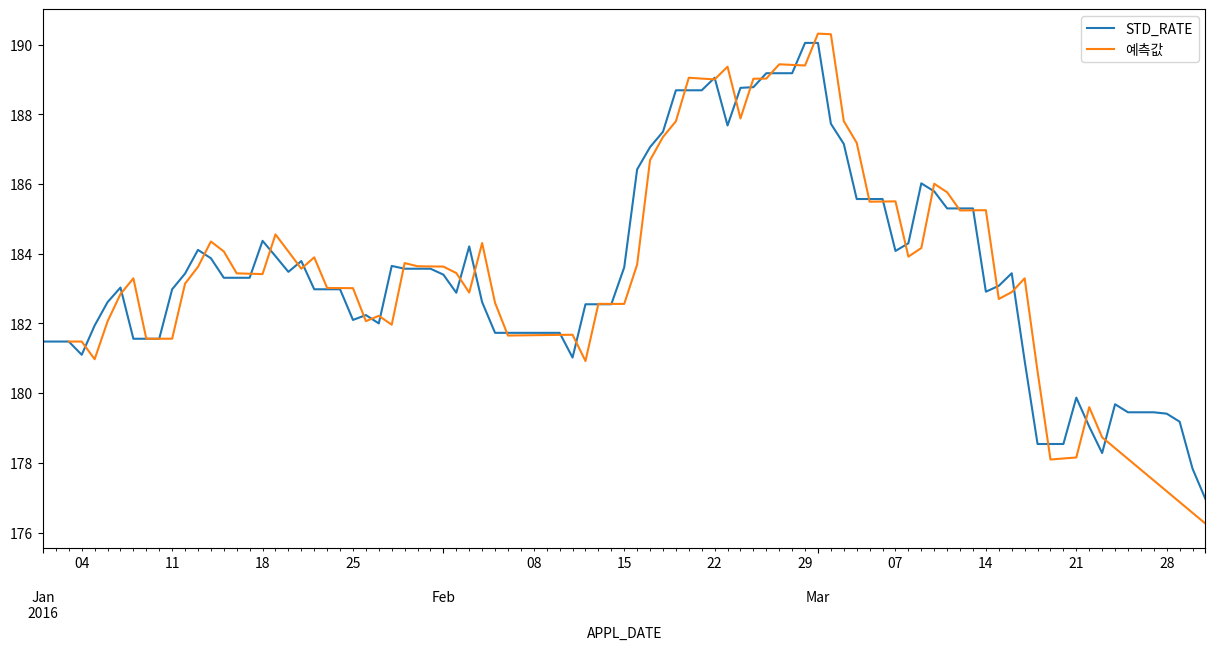

In [162]:
df_merge.plot(y=["STD_RATE","예측값"], figsize = (15,7))